# **Not an ideal network**

In [1]:
# https://keras.io/
# Installing Keras which is open-source neural-network library written in Python.
!pip install -q keras

# Importing the keras library.
import keras

Using TensorFlow backend.


In [0]:
# Importing NumPy (Numerical Python) which is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. It also gives an alias to the library.
import numpy as np

# There are two main types of models available in Keras: the Sequential model and the Model class used with the functional API.
# Sequential model is a linear stack of layers. Importing Sequential model from Keras.
from keras.models import Sequential

# Flattens the input. Importing Flatten core layer from Keras.
from keras.layers import Flatten

# 2D Convolutional layer which creates a convolution kernel that convolves over input to produce an output. Importing the convolutional layer from Keras.
from keras.layers import Convolution2D

# Importing the utils library of Keras.
from keras.utils import np_utils

# MNIST is a database of handwritten digits. It is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Importing MNIST dataset from Keras.
from keras.datasets import mnist

In [0]:
# Loading the MNIST 60000 Training and 10000 Test data into respective numpy arrays
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


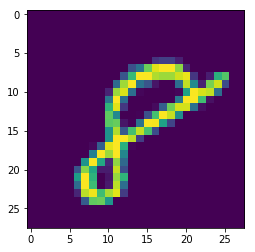

In [4]:
# Printing the shape of the Training data 
print (X_train.shape)

# Matplotlib is a plotting library for Python. Pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
from matplotlib import pyplot as plt

# Sets the backend of matplotlib to 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline

# Renders the image.
plt.imshow(X_train[59999])

In [0]:
# Reshaping the Training and Test data to add the channel parameter as the input to Conv2D layer is expected to be of shape (img_rows, img_cols, num_channels) if data_format="channels_last" which is default.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Normalizing the Training and Test values 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# Printing the first 10 labelled Training data
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# np.utils.to_categorical is used to convert array of labelled data (from 0 to nb_classes-1) to one-hot vector.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Printing the first 10 labelled Training data after converting to one-hot vector.
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation, MaxPooling2D

# Sequential model is linear stack of layers. We can add all the layers to the constructor or can use 'add' method to add layers.
model = Sequential() 

# Input is (28,28,1).
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Receptive field is (3,3).

# Input is (26,26,32).
model.add(Convolution2D(64, 3, 3, activation='relu')) # Receptive field is (5,5).

# Input is (24,24,64).
model.add(Convolution2D(128, 3, 3, activation='relu')) # Receptive field is (7,7).

# Input is (22,22,128).
model.add(MaxPooling2D(pool_size=(2, 2))) # Receptive field is (14,14).

# Input is (11,11,128).
model.add(Convolution2D(256, 3, 3, activation='relu')) # Receptive field is (16,16).

# Input is (9,9,256).
model.add(Convolution2D(512, 3, 3, activation='relu')) # Receptive field is (18,18).

# Input is (7,7,512).
model.add(Convolution2D(1024, 3, 3, activation='relu')) # Receptive field is (20,20).

# Input is (5,5,1024).
model.add(Convolution2D(2048, 3, 3, activation='relu')) # Receptive field is (22,22).

# Input is (3,3,2048).
model.add(Convolution2D(10, 3, 3, activation='relu')) # Receptive field is (24,24).

# Input is (1,1,10).
# Flattens the input.
model.add(Flatten())

model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: U

In [0]:
# Compiling the model
# Loss function is one of the arguments required for compiling a model. categorical_crossentropy loss function is used if the targets are one-hot encoded.
# Optimizer is one of the arguments required for compiling a model. Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
# A metric is a function that is used to judge the performance of your model.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# Training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10 , verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 2.2268 - acc: 0.1374
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

In [0]:
# Evaluating the model on the Test data. Returns the loss value & metrics values for the model in test mode.
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
# Printing the evaluation result
print(score)

[2.3025851249694824, 0.098]


In [0]:
# Generates output predictions for the input samples.
y_pred = model.predict(X_test)

In [16]:
# Printing the outputs. y_pred results do not look correct.
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


# WHAT IS WRONG WITH THE ABOVE NETWORK
  

1.   Far too many number of kernels were used. As the input image size is 28x28x1, we could limit the network to use 64 or 128 number of kernels at max.
2.   Global Receptive Field at the last layer (24X24) is not equal to the size of the image (considering size of the object is equal to size of the image which is 28x28).


